

# Passenger data from the Titanic

The dataset contains information about the passengers of the RMS Titanic, which sank on April 15, 1912, after colliding with an iceberg. The data includes attributes such as travel class, age, gender, number of siblings/spouses aboard, number of parents/children aboard, ticket price, and embarkation point.
The dataset also includes information on whether the passenger survived the disaster.
The Titanic carried over 2,200 people, of which over 1,500 perished, making this disaster one of the most tragic in maritime history.
Columns:
* pclass - Ticket class
* survived - Whether the passenger survived the disaster
* name - Passenger's name
* sex - Passenger's gender
* age - Passenger's age
* sibsp - Number of siblings/spouses aboard
* parch - Number of parents/children aboard
* ticket - Ticket number
* fare - Ticket price
* cabin - Cabin number
* embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat - Lifeboat number
* body - Body number (if the passenger did not survive and the body was recovered)
* home.dest - Destination

# Titanic Disaster in Numbers - Mateusz Nowakowski
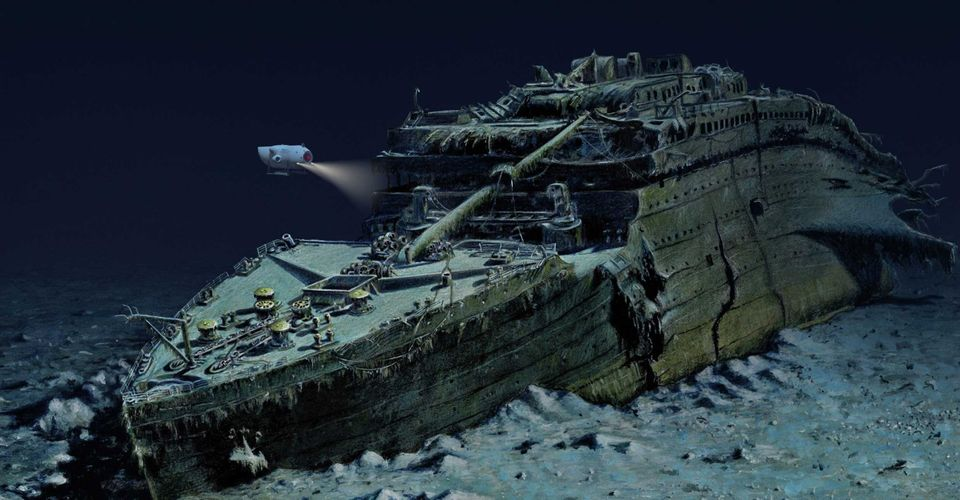

# Explanatory Data Analysis
## 1. General Data Overview
The subject of the analysis is the Titanic disaster. There were a total of 2,212 people on the Titanic: 1,320 passengers and 892 crew members. We have almost a complete list of all passengers.
It should be noted that the analysis concerns only passengers as we do not have data on the crew.
We have a dataset consisting of 1,310 rows and 14 columns, compiled - as we can guess - after the disaster. Seven columns contain numbers and the other seven contain strings. At first glance, we can see that the dataset has quite a few gaps and the data will require processing.

Source: https://en.wikipedia.org/wiki/Sinking_of_the_Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
#pd.options.display.max_rows = None
#df.sort_values(by="fare", ascending=True)

In [3]:
# Display basic information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


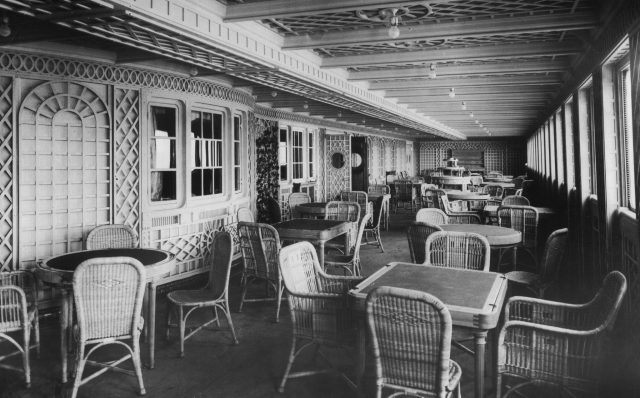

 ## 2. Analysis of Missing Values
 
 The dataset has many missing values. We will count and discuss them below.


In [4]:
# Display the last row because I noticed it was empty at the beginning
df.tail(1)

pclass  survived name  sex  age  sibsp  parch ticket  fare cabin  \
1309     NaN       NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   NaN   

     embarked boat  body home.dest  
1309      NaN  NaN   NaN       NaN

In [5]:
# Check how many duplicate rows there are
df.duplicated().sum()


0

In [6]:
# Since there are no duplicate rows, the last row is the only completely empty row in the dataframe.
# Let's remove it right at the beginning
df = df.drop(df.index[-1])

# Check if it really disappeared
df.tail(1)

pclass  survived                name   sex   age  sibsp  parch  ticket  \
1308     3.0       0.0  Zimmerman, Mr. Leo  male  29.0    0.0    0.0  315082   

       fare cabin embarked boat  body home.dest  
1308  7.875   NaN        S  NaN   NaN       NaN

### Below we create a separate dataframe that contains the sum of all missing values for each column.
Let's discuss each column:

 - columns 'pclass', 'survived', 'name', 'sex', 'sibsp', 'parch' and 'ticket' contain no missing values. This is very good news as these are key data for analysis
 - in columns fare and embarked we see only single missing values - we will replace fare column with median while embarked column can be removed as it won't be needed for further analysis.
 - columns 'cabin' and 'home destination' have many missing values but these are rather peripheral data so we will remove these two columns as they won't be needed for further analysis.
 - column 'body' i.e. body number contains the most missing values at 90%. The very fact that there is no body number tells us that the body was most likely not found. In this case, therefore, lack of number is valuable information. We will not interfere with this data.
 - in column 'boat' 823 records are missing. These are probably people who for various reasons did not make it onto a lifeboat. So we won't fill in missing data. The problem with this column, however, is that the same people have been assigned to more than one boat. For this reason, the column will require transformation.
 - I left the 'age' column for last and here is a bit of a problem because this is very important information and we are missing 263 records or 20%. I see two options here: 1. any analysis of correlation with age will be conducted on a reduced sample. 2. we replace with mean or median and then we have a full sample and any age correlation studies will be somewhat distorted but will apply to all passengers. Option 2 seems better.



In [7]:
#Now we check how many missing values there are in each column and what percentage they represent

#Count all empty rows
missing_values_count = df.isnull().sum()

#We make sure that 100% is all rows in the original dataframe
total_values = len(df)

#Calculate the percentage
missing_percentage = (missing_values_count / total_values) * 100

#   Tworzymy dataframe z listą brakujących wartości
df_missing_info = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_percentage
})

df_missing_info.style.set_caption("Missing Values and Percentage")

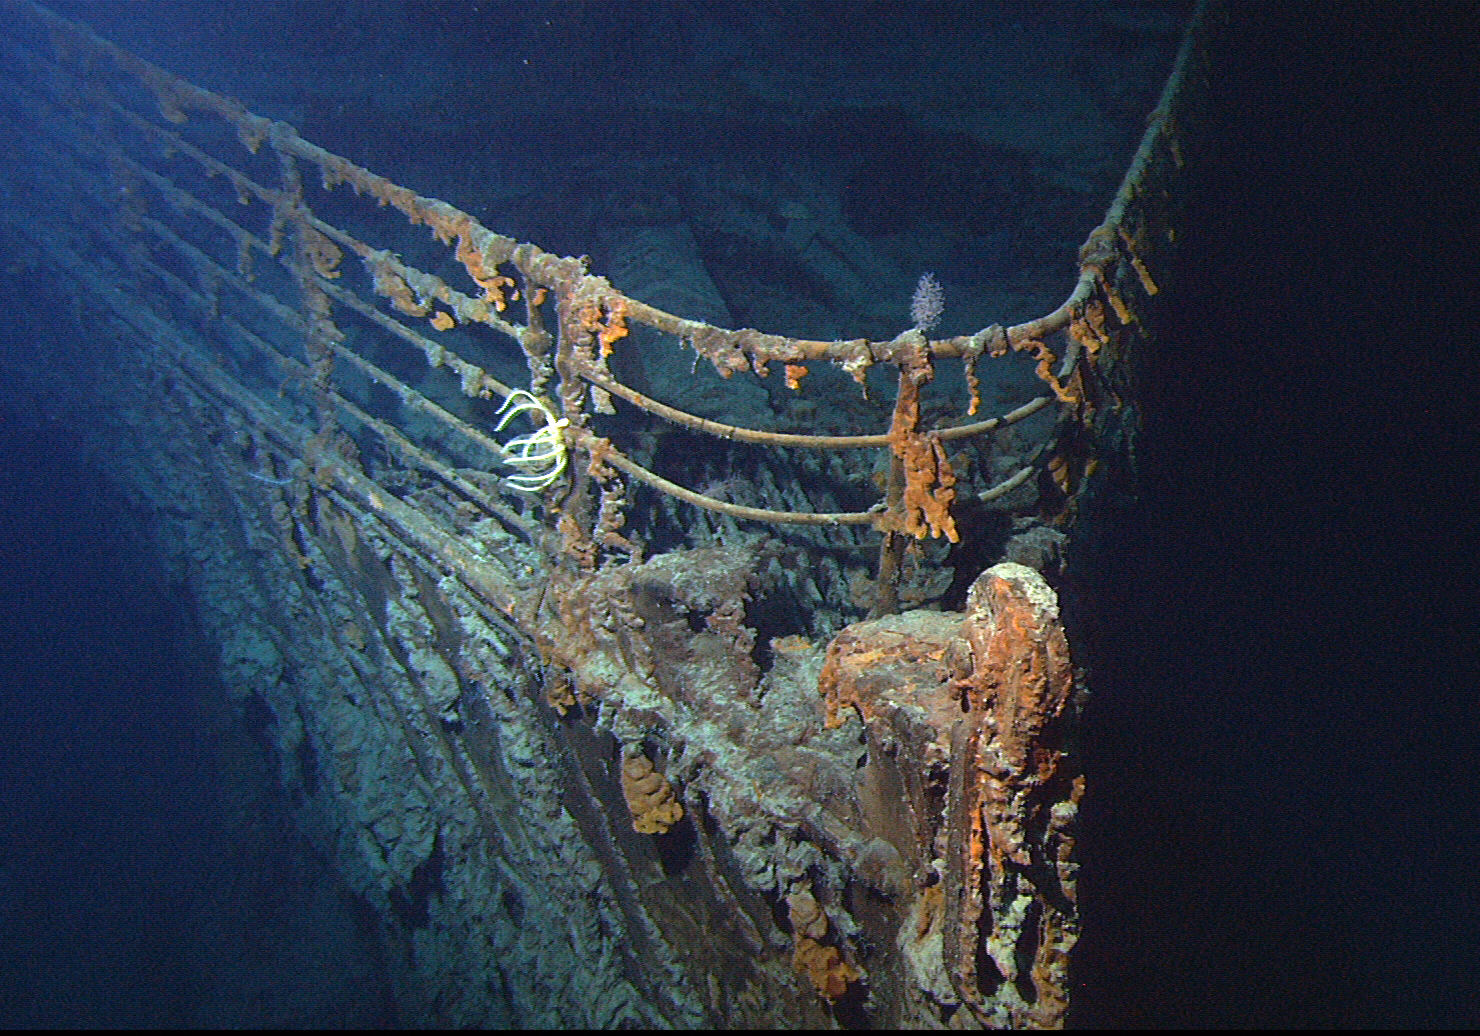

 ## Data Transformation
 Let me transform the data before we move on to analyzing individual variables.
 The data requires significant processing. I would like to change a few things before we start analysis and draw any conclusions.

 Let's list all the changes:
 - we remove columns 'ticket', 'embarked', 'cabin' and 'home.dest' because they won't be needed for what I want to show you.
 - columns 'sibsp'(siblings/spouse) and 'parch'(parents/children) are combined into one column and transformed so that we only know if someone traveled with family (1.0) or alone (0.0) - that should be enough
 - we fix the data in the 'boat' column so that one passenger is assigned to only one boat.
 - missing values in the 'fare' column are replaced with median
 - missing values in the 'age' column are replaced with median


In [8]:
# Remove the columns listed below
df.drop(columns=["ticket", "embarked", "cabin", "home.dest"], inplace=True)

# Let's see how it looks
df.head(1)

pclass  survived                           name     sex   age  sibsp  \
0     1.0       1.0  Allen, Miss. Elisabeth Walton  female  29.0    0.0   

   parch      fare boat  body  
0    0.0  211.3375    2   NaN

In [9]:
# Columns 'sibsp' and 'parch' are combined together into one simplified column
df['with family'] = (df['sibsp'] + df['parch'] > 0).astype(float)

# Permanently remove the original dataframe
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

# Change the order of columns
new_order =[ 'name',  'survived', 'sex', 'age', 'pclass', 'with family', 'fare', 'boat', 'body']
df = df[new_order]

# Let's see how it looks
df.sample(5)

name  survived     sex   age  \
902                         Johnston, Mr. Andrew G       0.0    male   NaN   
636  Arnold-Franchi, Mrs. Josef (Josefine Franchi)       0.0  female  18.0   
463                   Jefferys, Mr. Ernest Wilfred       0.0    male  22.0   
346                     Botsford, Mr. William Hull       0.0    male  26.0   
143                    Harder, Mr. George Achilles       1.0    male  25.0   

     pclass  with family     fare boat  body  
902     3.0          1.0  23.4500  NaN   NaN  
636     3.0          1.0  17.8000  NaN   NaN  
463     2.0          1.0  31.5000  NaN   NaN  
346     2.0          0.0  13.0000  NaN   NaN  
143     1.0          1.0  55.4417    5   NaN

In [10]:
# Display value_counts for the 'boat' column
df['boat'].value_counts()

boat
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
16         23
8          23
7          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: count, dtype: int64

In [11]:
# Fix the data so that one person is assigned to only one boat
df['boat'] = df['boat'].replace({'5 7': '5', 'C D': 'C', '13 15': '13', '5 9': '5', '8 10': '8', '13 15 B': '13', '15 16': '15'})

# Let's see how it looks
df['boat'].value_counts()

boat
13    42
C     40
15    38
14    33
4     31
5     30
10    29
3     26
9     25
11    25
8     24
16    23
7     23
D     20
6     20
12    19
2     13
A     11
B      9
1      5
Name: count, dtype: int64

In [12]:
# Replace missing values in the 'age' column with median
df['age'].fillna(df['age'].median(), inplace=True)

# Missing values in the 'fare' column are replaced with median
df['fare'].fillna(df['fare'].median(), inplace=True)

df.sample(5)

name  survived     sex  \
334                       Banfield, Mr. Frederick James       0.0    male   
1078                      O'Dwyer, Miss. Ellen "Nellie"       1.0  female   
825                      Goodwin, Master. Harold Victor       0.0    male   
1296                                   Wirz, Mr. Albert       0.0    male   
296   Thayer, Mrs. John Borland (Marian Longstreth M...       1.0  female   

       age  pclass  with family      fare boat   body  
334   28.0     2.0          0.0   10.5000  NaN    NaN  
1078  28.0     3.0          0.0    7.8792  NaN    NaN  
825    9.0     3.0          1.0   46.9000  NaN    NaN  
1296  27.0     3.0          0.0    8.6625  NaN  131.0  
296   39.0     1.0          1.0  110.8833    4    NaN

In [13]:
# Display missing values again
df.isnull().sum()

name              0
survived          0
sex               0
age               0
pclass            0
with family       0
fare              0
boat            823
body           1188
dtype: int64

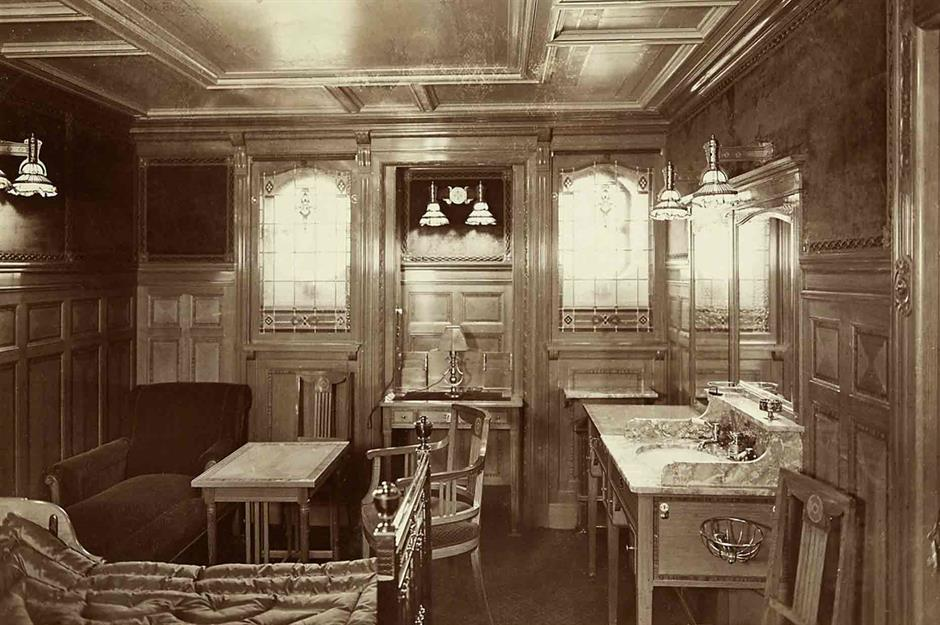

## 4. Single Variable Analysis
 
 Now that we have properly processed our dataframe, we will answer basic questions about individual variables:
 1. 'survived' - How many people survived the disaster?
 2. 'sex' - How many women and men were there?
 3. 'age' - Who were the youngest and oldest passengers and what was the average age?
 4. 'pclass' - How many people traveled in each class?
 5. 'with family' - How many people traveled alone versus with family?
 6. 'fare' - What was the cheapest and most expensive ticket, and what was the average and median ticket price?
 7. 'boat' - How many lifeboats were there and how many passengers were assigned to each lifeboat?
 8. 'body' - How many passengers who did not survive were assigned a body number?


In [14]:
# 1. How many passengers survived the disaster?

# Create a dataframe showing how many passengers survived the disaster
survived_values_count = df['survived'].value_counts()

# Make sure that 100% is all rows in the original dataframe
total_values = len(df)

# Calculate the percentage
survived_percentage = round((survived_values_count / total_values) * 100)

# Create a dataframe with the answer to the question
df_survived_count = pd.DataFrame({
    'Survivors': survived_values_count,
    'Percentage': survived_percentage
})

df_survived_count.style.set_caption("Number and Percentage of Survivors")

In [15]:
# 2. How many passengers were on board with a breakdown by gender?

# Calculate how many men and women there were
gender_values_count = df['sex'].value_counts()

#  Before calculating the percentage, make sure that 100% is all rows in the original dataframe
total_values = len(df)

# Calculate the percentage
gender_percentage = round((gender_values_count / total_values) * 100)

# Create a dataframe with the answer to the question
df_gender_count = pd.DataFrame({
    'Gender Count': gender_values_count,
    'Percentage': gender_percentage
})

df_gender_count.style.set_caption("Number and Percentage of Passengers by Gender")

In [16]:
# 3. What was the youngest and oldest passenger, and what was the average and median age?
age_agg_df = df.agg({'age': ['min','mean', 'median', 'max']})
                   
age_agg_df.style.set_caption("Youngest, Oldest, Average and Median Age")

In [17]:
# 4. How many passengers were in each class?
class_values_count = df['pclass'].value_counts()

# Additionally, we express this as a percentage
total_values = len(df)
class_percentage = round((class_values_count / total_values) * 100)

# Create a dataframe
df_class_count = pd.DataFrame({
    'Class Count': class_values_count,
    'Percentage': class_percentage})

df_class_count.style.set_caption("Number and Percentage of Passengers in Each Class")

In [18]:
# 5. How many people traveled alone versus with family?
family_values_count = df['with family'].value_counts()

# Additionally, we express this as a percentage
total_values = len(df)
family_percentage = round((family_values_count / total_values) * 100)

# Create a dataframe
df_family_count = pd.DataFrame({
    'Family Count': family_values_count,
    'Percentage': family_percentage})

df_family_count.style.set_caption("Number and Percentage of Passengers Traveling Alone vs. With Family")

In [19]:
# 6. What was the cheapest and most expensive ticket, and what was the average and median ticket price?

# Filter out free tickets - we will return to them in the next part of the analysis
df_fare = df[df['fare']>0]
fare_agg_df = df_fare.agg({'fare': ['min','mean', 'median', 'max']})
                   
fare_agg_df.style.set_caption("Cheapest, Most Expensive, Average and Median Ticket Price")

In [20]:
# 7. How many lifeboats were there and how many passengers were assigned to each lifeboat?
boat_values_count = df['boat'].value_counts()

# Create a dataframe
df_boat_count = pd.DataFrame({
    'People In the boat': boat_values_count,})

df_boat_count.style.set_caption("Number of Passengers in Each Lifeboat")

In [21]:
# Count all people in the boats
df_boat_count.sum()

People In the boat    486
dtype: int64

In [22]:
# 8. How many passengers who did not survive the disaster were assigned a body number?

# Count all people who did not survive
df_not_survived = df[df['survived']==0.0]

# Count all people who did not survive
not_survived_with_number = df_not_survived['body'].notna().sum()

# Calculate the percentage of people who did not survive
total_not_survived = len(df_not_survived) 
percentage_with_number = (not_survived_with_number / total_not_survived) * 100

# Create a dataframe to make it look nice
df_body_number_count = pd.DataFrame({
    'Total Not Survived': [total_not_survived],
    'Not Survived With Body Number': [not_survived_with_number],
    'Percentage': [percentage_with_number]
})
# Create another dataframe without percentages for the chart
df_bodies = pd.DataFrame({
    'Category': ['Total Not Survived', 'Total Bodies Recovered'],
    'Count': [total_not_survived, not_survived_with_number]
})

df_body_number_count.style.set_caption("How many passengers who did not survive the disaster were assigned a body number?")

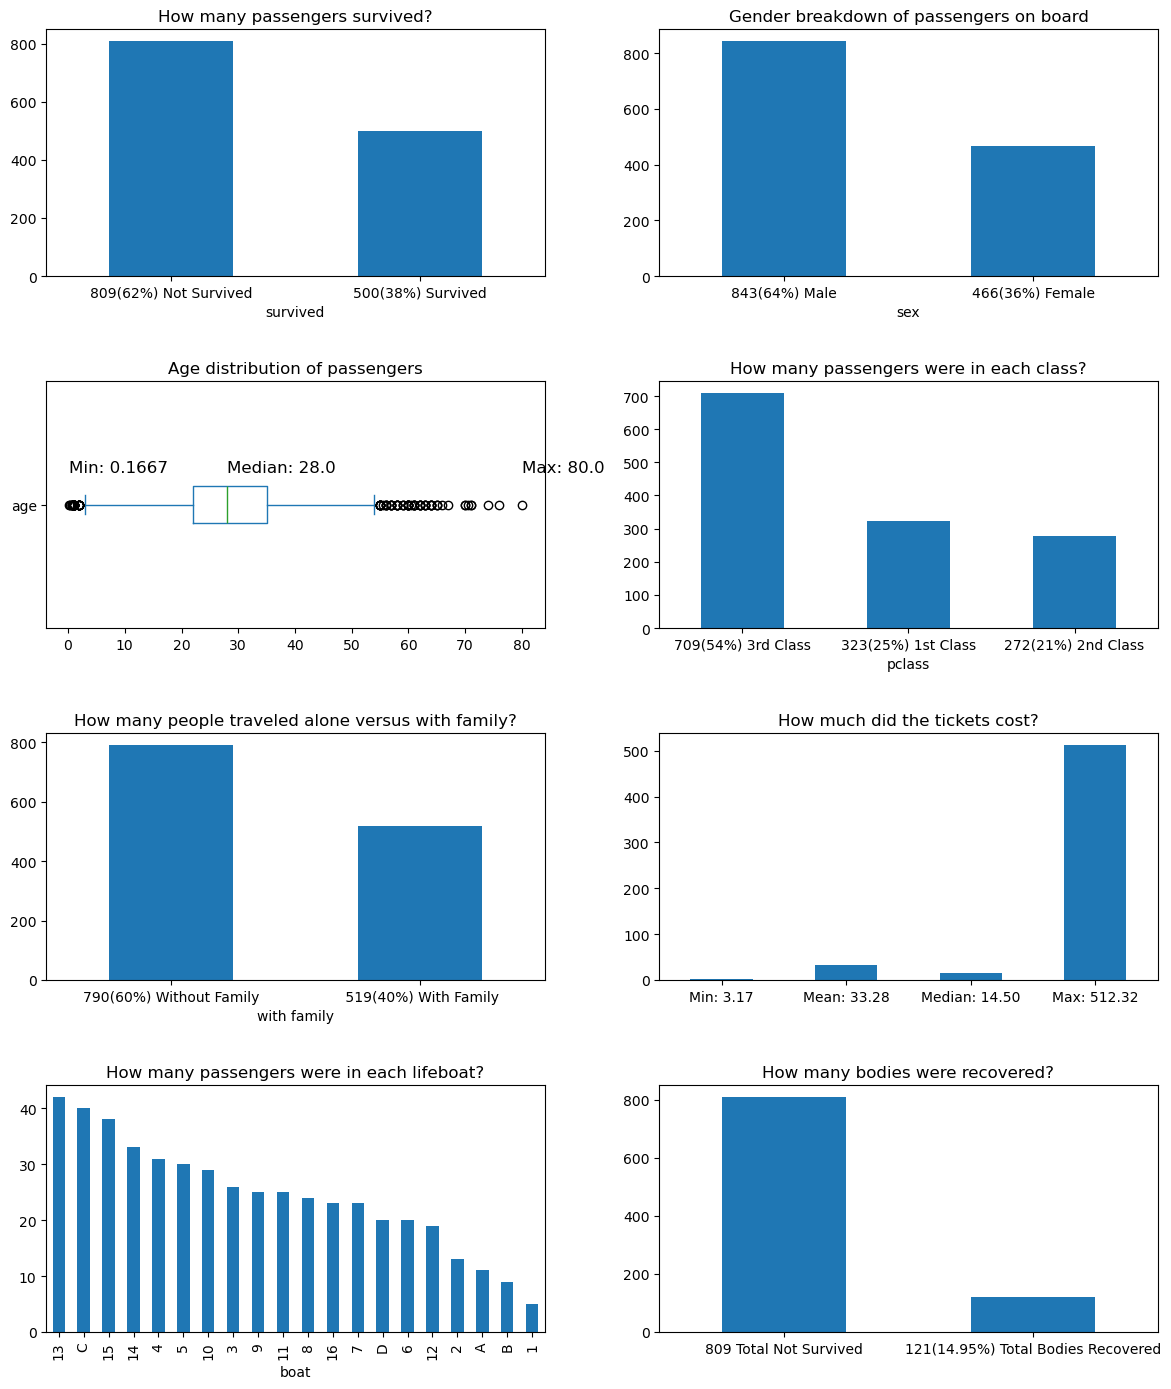

In [23]:
# Create charts for each variable
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

# 1. How many passengers survived the disaster?
survived_values_count.plot(kind='bar', ax=axes[0, 0], legend=False)
labels = ['809(62%) Not Survived', '500(38%) Survived']
axes[0, 0].set_xticklabels(labels, rotation=0)
axes[0, 0].set_title('How many passengers survived?')

# 2. How many passengers were on board with a breakdown by gender?
gender_values_count.plot(kind='bar', ax=axes[0, 1], legend=False)
labels1 = ['843(64%) Male', '466(36%) Female']
axes[0, 1].set_xticklabels(labels1, rotation=0)
axes[0, 1].set_title('Gender breakdown of passengers on board')

# 3. What was the youngest and oldest passenger, and what was the average and median age?
age = df['age']
df_age = pd.DataFrame({'age': age})
df_age.plot(kind='box', ax=axes[1, 0], legend=False, vert=False)
axes[1, 0].set_title('Age distribution of passengers')
stats = df_age['age'].describe()
min_val = stats['min']
q1_val = stats['25%']
median_val = stats['50%']
q3_val = stats['75%']
max_val = stats['max']


y_position_above = 1.15

axes[1, 0].text(median_val, y_position_above, f'Median: {median_val}', verticalalignment='center', fontsize=12, color='black')
axes[1, 0].text(min_val, y_position_above, f'Min: {min_val}', verticalalignment='center', fontsize=12, color='black')
axes[1, 0].text(max_val, y_position_above, f'Max: {max_val}', verticalalignment='center', fontsize=12, color='black')

# 4. How many passengers were in each class?
class_values_count.plot(kind = 'bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('How many passengers were in each class?')
labels1 = ['709(54%) 3rd Class', '323(25%) 1st Class', '272(21%) 2nd Class']
axes[1, 1].set_xticklabels(labels1, rotation=0)

# 5. How many people traveled alone versus with family?
family_values_count.plot(kind = 'bar', ax=axes[2, 0], legend=False)
axes[2, 0].set_title('How many people traveled alone versus with family?')
labels2 = ['790(60%) Without Family', ' 519(40%) With Family']
axes[2, 0].set_xticklabels(labels2, rotation=0)

# 6. What was the cheapest and most expensive ticket, and what was the average and median ticket price?
fare_agg_df.plot(kind = 'bar', ax=axes[2, 1], legend=False)
axes[2, 1].set_title('How much did the tickets cost?')
labels2 = ['Min: 3.17', 'Mean: 33.28', 'Median: 14.50', 'Max: 512.32']
axes[2, 1].set_xticklabels(labels2, rotation=0)

# 7. How many lifeboats were there and how many passengers were assigned to each lifeboat?
df_boat_count.plot(kind = 'bar', ax=axes[3, 0], legend=False)
axes[3, 0].set_title('How many passengers were in each lifeboat?')

# 8. How many passengers who did not survive the disaster were assigned a body number?
df_bodies.plot(kind = 'bar', ax=axes[3, 1], legend=False)
axes[3, 1].set_title('How many bodies were recovered?')
labels3 = ['809 Total Not Survived', '121(14.95%) Total Bodies Recovered']
axes[3, 1].set_xticklabels(labels3, rotation=0)

plt.tight_layout(h_pad=3.0)

 ## Summary of the analysis of individual variables
 
 After an initial analysis of the variables, we learn that:
 1. 500 passengers survived the disaster, which represents only 38% of all passengers.
 2. Among the passengers, there were 843 men and 466 women, accounting for 64% and 36%, respectively.
 3. The youngest passenger was only two months old, the oldest was 80 years old, the average age was nearly 30 years,
    and the median age was 28 years.
 4. 323 (25%) passengers traveled in 1st class, 272 (21%) in 2nd class, and as many as 709 (54%) in 3rd class.
 5. 790 (60%) passengers traveled without family members, while 519 (40%) traveled with family.
 6. The cheapest ticket among the passengers was free*, the cheapest non-free ticket cost 3.14 GBP, the average ticket price was 33.28 GBP, the median was 14.45 GBP, and the most expensive ticket was 512.32 GBP.
 7. There were 20 lifeboats on the Titanic, which collectively accommodated 486 survivors.
 8. Only 121 out of 809 passengers who did not survive the disaster were assigned a body number, indicating that only
    14% of the bodies of all passengers who perished were recovered.
 
 *This is neither an error nor a missing value - there were passengers on the Titanic with free tickets (funded by the carrier). We will discuss free tickets on the Titanic during the analysis of the outliers.


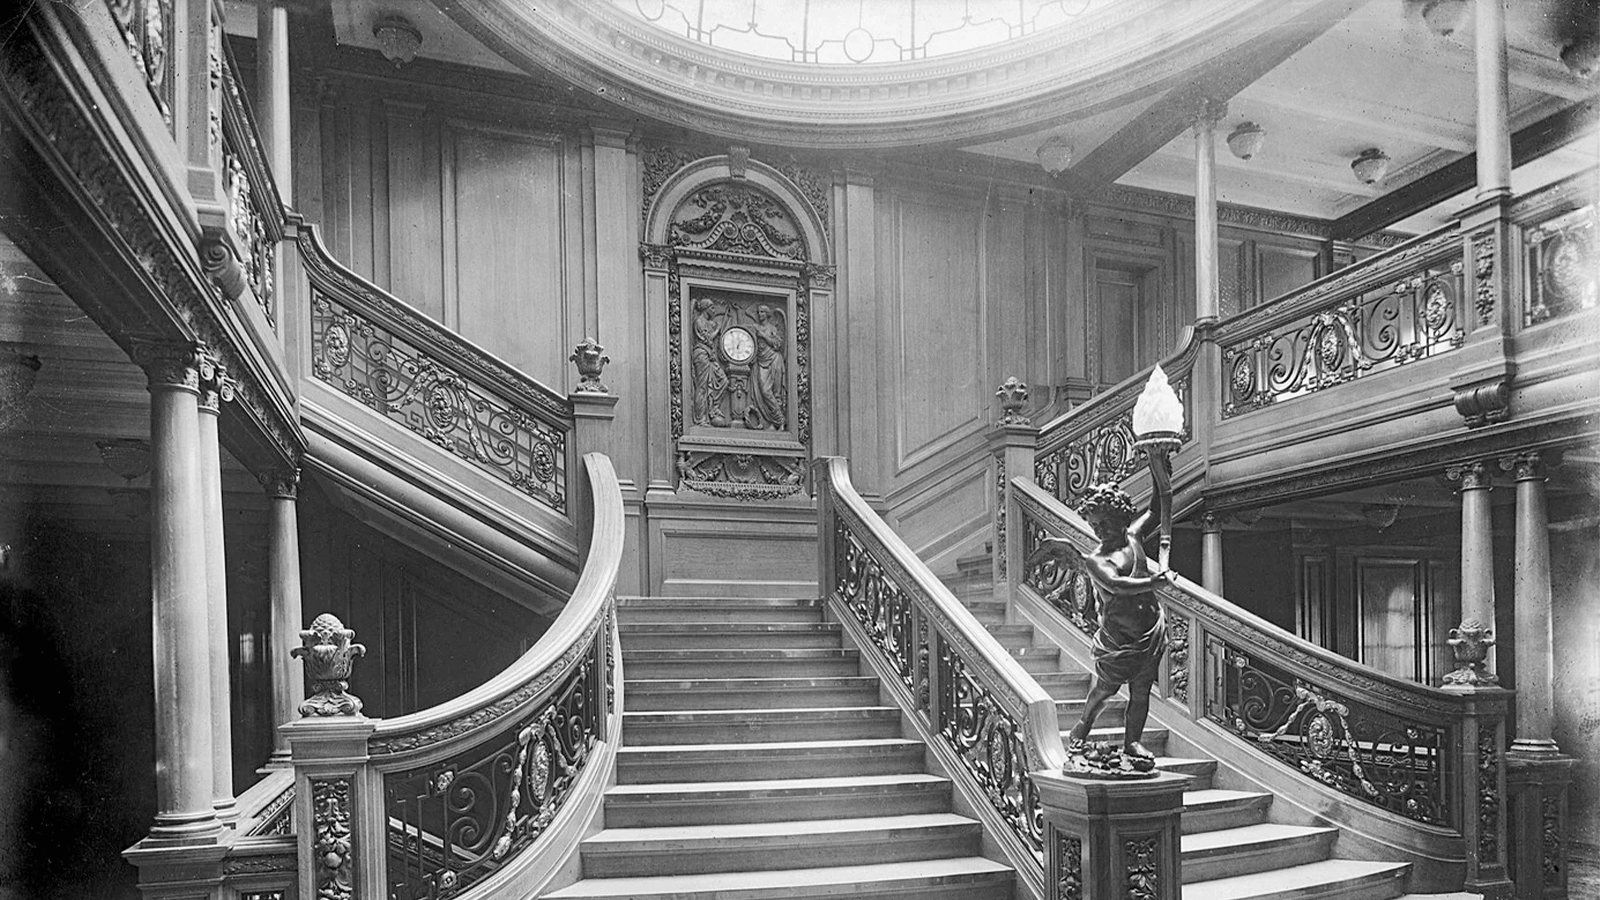

 # 5. Analysis of Relationships Between Variables.
 
 At this stage, we will focus on examining the relationships between variables. Initially, we will investigate the survival chances of passengers. We will try to determine which variables played the most significant role in the fight for survival. Do survival chances depend on age, gender, wealth, or whether someone traveled alone or with family? We will also discuss other interesting topics. Below is a list of questions I intend to answer:

 1. How many men and women were there in relation to how many men and women survived the disaster?
 2. How many men and women were there in relation to how many men and women survived the disaster, broken down by class?
 3. How many children (<18) were there in each class - how many children survived in each class?
 4. How many elderly people (60+) were there in each class - how many 60+ people survived in each class?
 5. Did passengers who paid more for their tickets have a higher chance of survival, considering the class breakdown?
 6. Did passengers traveling with family have a higher chance of survival than those traveling alone, considering the class breakdown, and is there a correlation for men who have the lowest survival rate?
 7. Distribution of people in lifeboats, considering the class breakdown. Were first-class passengers privileged - did they have their own lifeboats and more space?


In [24]:
#1. How many men and women were there in relation to how many men and women survived the disaster

#  Calculate the total number of male and female passengers
total_gender_counts = df['sex'].value_counts()

# Calculate the number of male and female passengers who survived
survived_gender_counts = df[df['survived'] == 1]['sex'].value_counts()

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'Total': total_gender_counts,
    'Survived': survived_gender_counts
}).fillna(0)

# Calculate percentages
comparison_df['Total_Percentage'] = (comparison_df['Total'] / comparison_df['Total'].sum()) * 100
comparison_df['Survived_Percentage'] = (comparison_df['Survived'] / comparison_df['Survived'].sum()) * 100
# Add title
comparison_df1 = comparison_df.style.set_caption("1. How many men and women were there in relation to how many men and women survived the disaster?")
comparison_df1


In [25]:
# 2. How many men and women were there in each class - how many men and women survived the disaster?

# Group by 'pclass', 'sex' to get total counts
total_counts = df.groupby(['pclass', 'sex']).size().unstack(fill_value=0)

# Group by 'pclass', 'sex', and 'survived' to get counts of survivors
survivor_counts = df[df['survived'] == 1].groupby(['pclass', 'sex']).size().unstack(fill_value=0)

# Calculate the percentage of survivors
survivor_percentage = (survivor_counts / total_counts) * 100

# Combine total counts, survivor counts, and survivor percentage into a single DataFrame
combined_df0 = pd.concat([total_counts, survivor_counts, survivor_percentage], axis=1, keys=['Total', 'Survived', 'Survival Percentage'])

# Combine total counts and survivor counts into a single DataFrame
combined_df1 = pd.concat([total_counts, survivor_counts], axis=1, keys=['Total', 'Survived'])
# Rename the columns for clarity
combined_df0.columns.names = ['Count Type', 'Sex']

combined_df0.style.set_caption("2. How many men and women were there in each class - how many men and women survived the disaster?")


In [26]:
# 3. How many children were there in each class - how many children survived in each class?

# Filter children under 18
children_df = df[df['age'] < 18]

# Group by class and survival status
grouped = children_df.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate total children in each class
total_children = grouped.sum(axis=1)

# Calculate percentage of children who survived in each class
percentage_survived = (grouped[1] / total_children) * 100

# Create a dataframe with the results
result_df3 = pd.DataFrame({
    'Total Children': total_children,
    'Survived': grouped[1],
    'Survived (%)': percentage_survived
})

result_df3.style.set_caption("3. How many children were there in each class - how many children survived in each class?")


In [27]:
# 4. How many elderly people (50+) were there in each class - how many elderly people (50+) survived in each class?

# Filter passengers over 50
over_50 = df[df['age'] > 50]

# Group by class and survival status
grouped = over_50.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate total number of people over 50 who survived
total__over_50 = grouped.sum(axis=1)

# Calculate percentage of all people over 50 who survived in each class
percentage_survived = (grouped[1] / total__over_50) * 100

# Create a dataframe with the results
result_df4 = pd.DataFrame({
    'Total Elders': total__over_50,
    'Survived': grouped[1],
    'Survived (%)': percentage_survived
})

result_df4.style.set_caption("4. How many elderly people (50+) were there in each class - how many elderly people (50+) survived in each class?")


In [28]:
# 5. Did passengers who paid more for their tickets have a higher chance of survival?

# Function to calculate survival rate for top and bottom 20% fare passengers in each class
def survival_rate_by_fare_class(df):
    result = []
    for pclass in sorted(df['pclass'].unique()):
        class_df = df[df['pclass'] == pclass]

        # Calculate the 20% most expensive and cheapest tickets
        top_20_percentile = class_df['fare'].quantile(0.80)
        bottom_20_percentile = class_df['fare'].quantile(0.20)

        top_20_df = class_df[class_df['fare'] >= top_20_percentile]
        bottom_20_df = class_df[class_df['fare'] <= bottom_20_percentile]

        # Calculate survival rates
        top_20_survived = top_20_df['survived'].sum()
        bottom_20_survived = bottom_20_df['survived'].sum()

        top_20_total = len(top_20_df)
        bottom_20_total = len(bottom_20_df)

        result.append({
            'Class': pclass,
            'Top 20% Survived': top_20_survived,
            'Top 20% Total': top_20_total,
            'Top 20% Survival Rate (%)': (top_20_survived / top_20_total) * 100 if top_20_total > 0 else 0,
            'Bottom 20% Survived': bottom_20_survived,
            'Bottom 20% Total': bottom_20_total,
            'Bottom 20% Survival Rate (%)': (bottom_20_survived / bottom_20_total) * 100 if bottom_20_total > 0 else 0
        })

    return pd.DataFrame(result)

# Generate the dataframe
survival_rate_df = survival_rate_by_fare_class(df)

survival_rate_df.style.set_caption("5. Did passengers who paid more for their tickets have a higher chance of survival?")


In [29]:
# 6. Survival rates of passengers with and without family, broken down by class. Survival rates of men with family

# 1. Filtering the dataframe for male passengers
male_df = df[df['sex'] == 'male']

# 2. Grouping by class and family status, then calculating survival rates for male passengers
male_survival_rates = male_df.groupby(['pclass', 'with family'])['survived'].agg(['sum', 'count']).reset_index()
male_survival_rates['survival_rate'] = male_survival_rates['sum'] / male_survival_rates['count'] * 100

# 3. Pivot the male dataframe for better visualization
male_pivot_table = male_survival_rates.pivot(index='pclass', columns='with family', values=['sum', 'count', 'survival_rate'])
male_pivot_table.columns = ['_'.join(map(str, col)).strip() for col in male_pivot_table.columns.values]
male_pivot_table.reset_index(inplace=True)

# 4. Renaming columns for male pivot table
male_pivot_table.columns = ['Class', 'Male_Survived_Alone', 'Male_Survived_With_Family', 'Male_Total_Alone', 'Male_Total_With_Family', 'Male_Survival_Rate_Alone', 'Male_Survival_Rate_With_Family']

# 5. Grouping by class and family status, then calculating survival rates for all passengers
overall_survival_rates = df.groupby(['pclass', 'with family'])['survived'].agg(['sum', 'count']).reset_index()
overall_survival_rates['survival_rate'] = overall_survival_rates['sum'] / overall_survival_rates['count'] * 100

# 6. Pivot the general dataframe for better visualization
overall_pivot_table = overall_survival_rates.pivot(index='pclass', columns='with family', values=['sum', 'count', 'survival_rate'])
overall_pivot_table.columns = ['_'.join(map(str, col)).strip() for col in overall_pivot_table.columns.values]
overall_pivot_table.reset_index(inplace=True)

# 7. Renaming columns for overall pivot table
overall_pivot_table.columns = ['Class', 'Survived_Alone', 'Survived_With_Family', 'Total_Alone', 'Total_With_Family', 'Survival_Rate_Alone', 'Survival_Rate_With_Family']

# 8. Combining the dataframes (aligning on 'Class' column)
combined_df = pd.merge(overall_pivot_table, male_pivot_table, on='Class', how='inner')

combined_df.style.set_caption("6. Survival rates of passengers with and without family, broken down by class. Survival rates of men with family")


In [30]:
# 7. Distribution of people in lifeboats with a breakdown by class.
# Were first-class passengers privileged - did they have their own lifeboats and more space?
df_boat = df.dropna(subset=['boat'])

# Group by 'boat' and 'pclass', then count the number of passengers
df_grouped = df_boat.groupby(['boat', 'pclass']).size().unstack(fill_value=0)

df_grouped.style.set_caption("7. Distribution of people in lifeboats with a breakdown by class. Were first-class passengers privileged - did they have their own lifeboats and more space?")


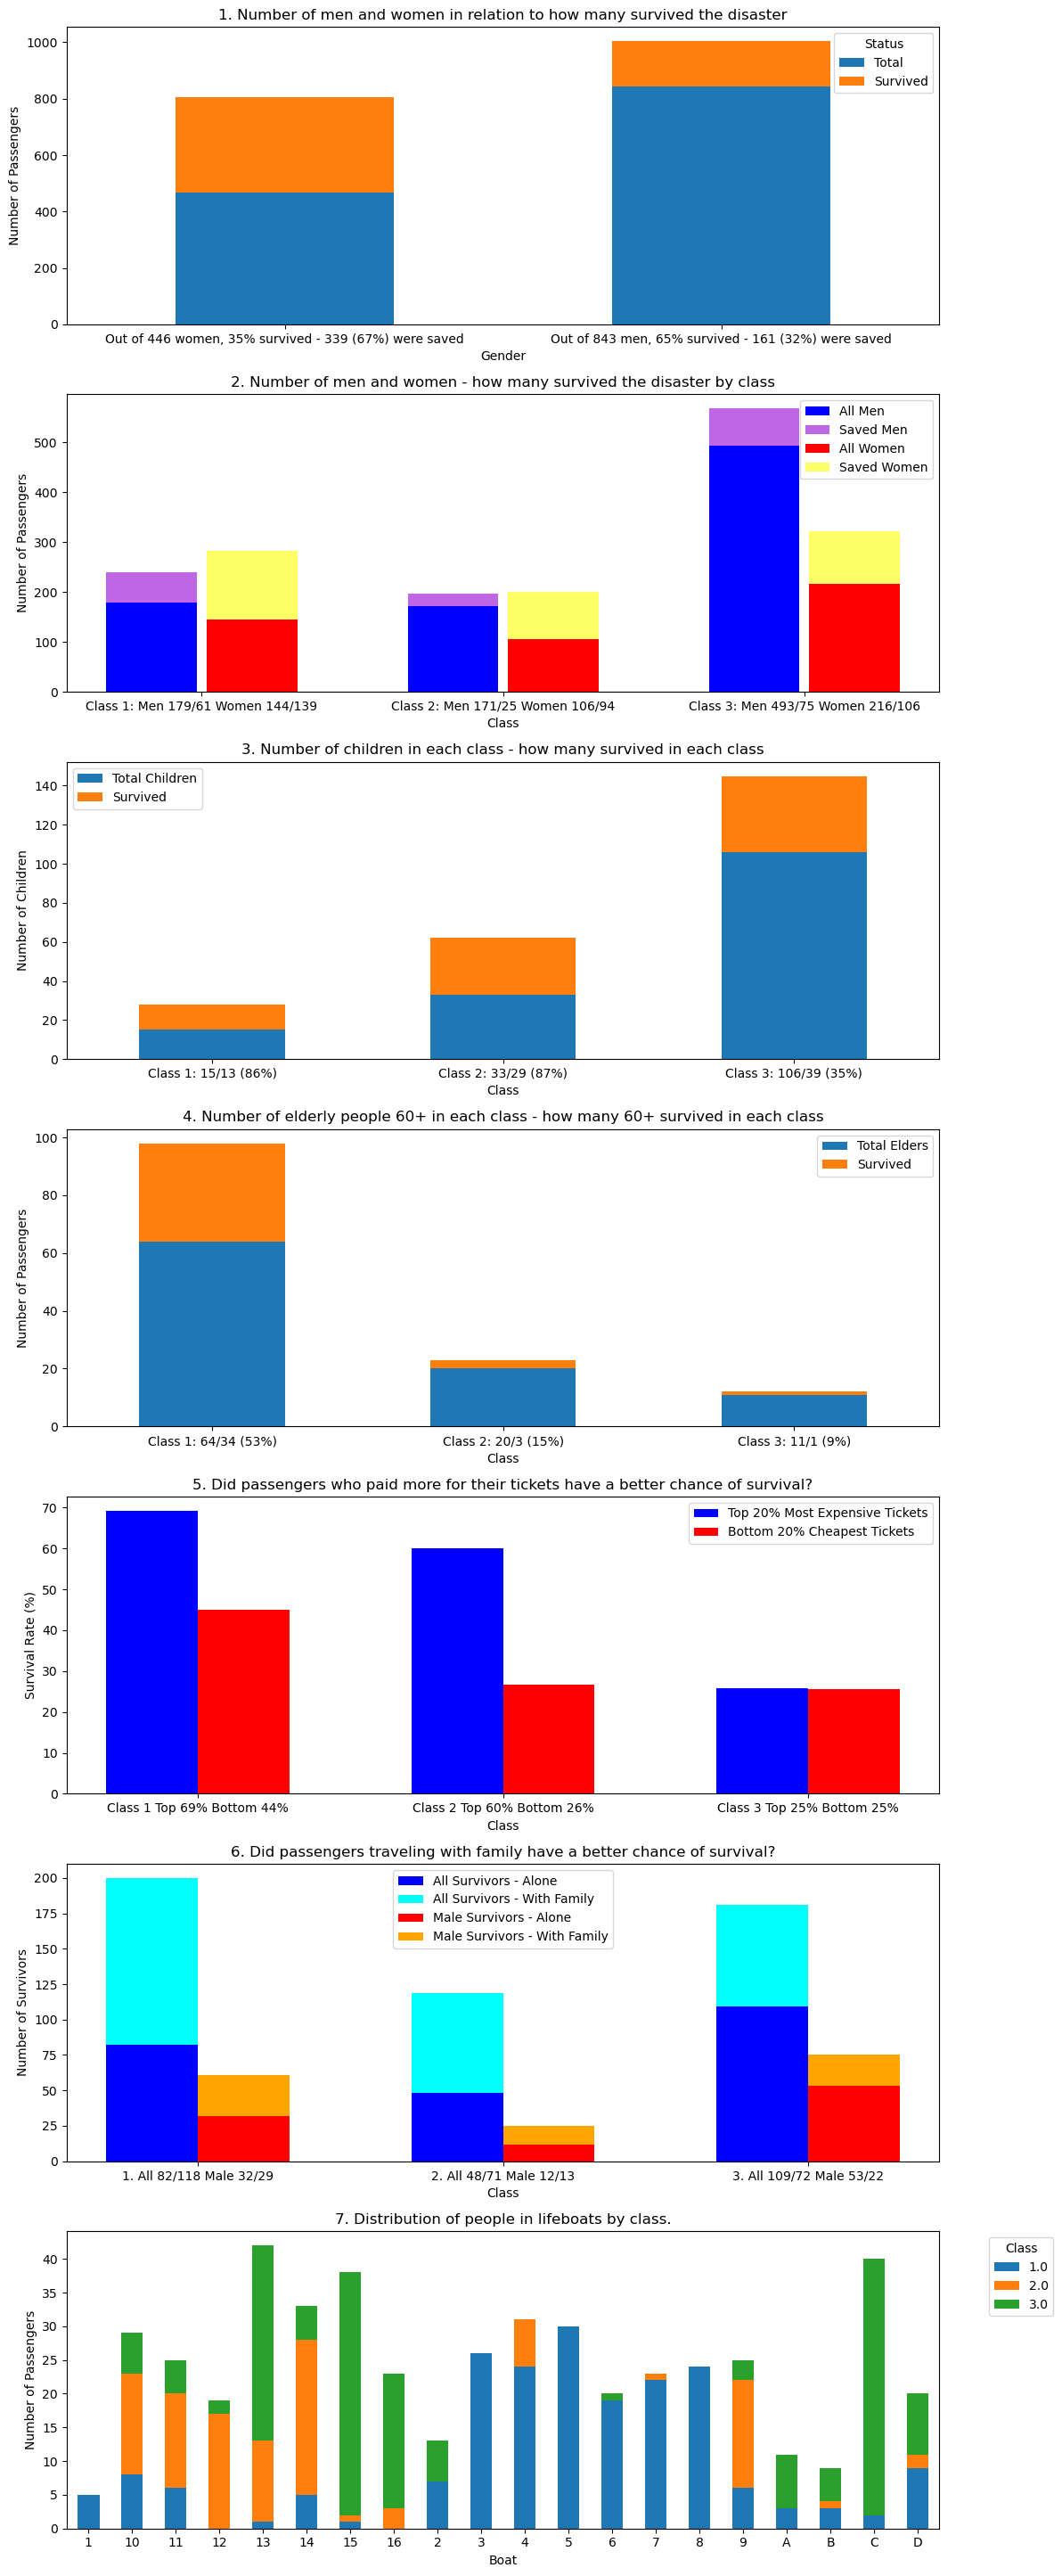

In [31]:
# Creating visualizations

fig, axes = plt.subplots(7, 1, figsize=(12, 29))

# 1. Number of men and women - how many men and women survived the disaster
comparison_df[['Total', 'Survived']].plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('1. Number of men and women in relation to how many survived the disaster')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Passengers')
axes[0].legend(title='Status')
labels = ['Out of 446 women, 35% survived - 339 (67%) were saved', 'Out of 843 men, 65% survived - 161 (32%) were saved']
axes[0].set_xticklabels(labels, rotation=0)

# 2. Number of men and women - how many men and women survived the disaster by class
total_male = combined_df1['Total'].loc[:, 'male']
total_female = combined_df1['Total'].loc[:, 'female']
survived_male = combined_df1['Survived'].loc[:, 'male']
survived_female = combined_df1['Survived'].loc[:, 'female']

# Define bar width and offset
bar_width = 0.30
offset = bar_width / 1.8

# Plot for males
bar_positions_male = range(len(total_male.index))
axes[1].bar([p - offset for p in bar_positions_male], total_male, bar_width, color='blue', label='All Men')
axes[1].bar([p - offset for p in bar_positions_male], survived_male, bar_width, bottom=total_male, color='darkviolet', label='Saved Men', alpha=0.6)

# Plot for females
bar_positions_female = range(len(total_female.index))
axes[1].bar([p + offset for p in bar_positions_female], total_female, bar_width, color='red', label='All Women')
axes[1].bar([p + offset for p in bar_positions_female], survived_female, bar_width, bottom=total_female, color='yellow', label='Saved Women', alpha=0.6)

# Set titles and labels
axes[1].set_title('2. Number of men and women - how many survived the disaster by class')
axes[1].set_ylabel('Number of Passengers')
axes[1].set_xlabel('Class')

# Set x-tick labels to be the class names (e.g., Class 1, Class 2, Class 3)
axes[1].set_xticks(bar_positions_male)
labels = ['Class 1: Men 179/61 Women 144/139', 'Class 2: Men 171/25 Women 106/94', 'Class 3: Men 493/75 Women 216/106']
axes[1].set_xticklabels(labels, rotation=0)

# Display legend
axes[1].legend()

# 3. Number of children in each class - how many children survived in each class
result_df3[['Total Children', 'Survived']].plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('3. Number of children in each class - how many survived in each class')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Number of Children')
labels = ['Class 1: 15/13 (86%)', 'Class 2: 33/29 (87%)', 'Class 3: 106/39 (35%)']
axes[2].set_xticklabels(labels, rotation=0)

# 4. Number of elderly people 60+ in each class - how many 60+ survived in each class
result_df4[['Total Elders', 'Survived']].plot(kind='bar', stacked=True, ax=axes[3])
axes[3].set_title('4. Number of elderly people 60+ in each class - how many 60+ survived in each class')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Number of Passengers')
labels = ['Class 1: 64/34 (53%)', 'Class 2: 20/3 (15%)', 'Class 3: 11/1 (9%)']
axes[3].set_xticklabels(labels, rotation=0)

# 5. Did passengers who paid more for their tickets have a better chance of survival?
# Define the width of the bars
bar_width = 0.30

# Positions of the bars on the x-axis
r1 = np.arange(len(survival_rate_df['Class']))
r2 = [x + bar_width for x in r1]

# Plot the bars
axes[4].bar(r1, survival_rate_df['Top 20% Survival Rate (%)'], color='blue', width=bar_width, label='Top 20% Most Expensive Tickets')
axes[4].bar(r2, survival_rate_df['Bottom 20% Survival Rate (%)'], color='red', width=bar_width, label='Bottom 20% Cheapest Tickets')

# Adding labels and title
axes[4].set_title('5. Did passengers who paid more for their tickets have a better chance of survival?')
axes[4].set_xlabel('Class')
axes[4].set_ylabel('Survival Rate (%)')

# Setting the x-ticks and labels
axes[4].set_xticks([r + bar_width/2 for r in range(len(survival_rate_df['Class']))])
axes[4].set_xticklabels(['Class 1 Top 69% Bottom 44%', 'Class 2 Top 60% Bottom 26%', 'Class 3 Top 25% Bottom 25%'])

# Adding a legend
axes[4].legend()

# 6. Survival rates of passengers with and without family, broken down by class. Survival rates of men with family
# Plotting survival counts for all passengers
axes[5].bar(r1, combined_df['Survived_Alone'], color='blue', width=bar_width, label='All Survivors - Alone')
axes[5].bar(r1, combined_df['Survived_With_Family'], color='cyan', width=bar_width, bottom=combined_df['Survived_Alone'], label='All Survivors - With Family')

# Plotting survival counts for male passengers
axes[5].bar(r2, combined_df['Male_Survived_Alone'], color='red', width=bar_width, label='Male Survivors - Alone')
axes[5].bar(r2, combined_df['Male_Survived_With_Family'], color='orange', width=bar_width, bottom=combined_df['Male_Survived_Alone'], label='Male Survivors - With Family')

# Labeling the plot
axes[5].set_xlabel('Class')
axes[5].set_ylabel('Number of Survivors')
axes[5].set_title('6. Did passengers traveling with family have a better chance of survival?')
axes[5].set_xticks([r + bar_width / 2 for r in range(len(combined_df))])
axes[5].set_xticklabels(['1. All 82/118 Male 32/29', '2. All 48/71 Male 12/13', '3. All 109/72 Male 53/22'])
axes[5].legend()

# 7. Distribution of people in lifeboats by class.
# Were first-class passengers privileged - did they have their own lifeboats and more space?
df_grouped.plot(kind='bar', stacked=True, ax=axes[6])
axes[6].set_title('7. Distribution of people in lifeboats by class.')
axes[6].set_xlabel('Boat')
axes[6].set_ylabel('Number of Passengers')
axes[6].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
labels = ['1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D']
axes[6].set_xticklabels(labels, rotation=0)


plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in the figure area.
plt.show()

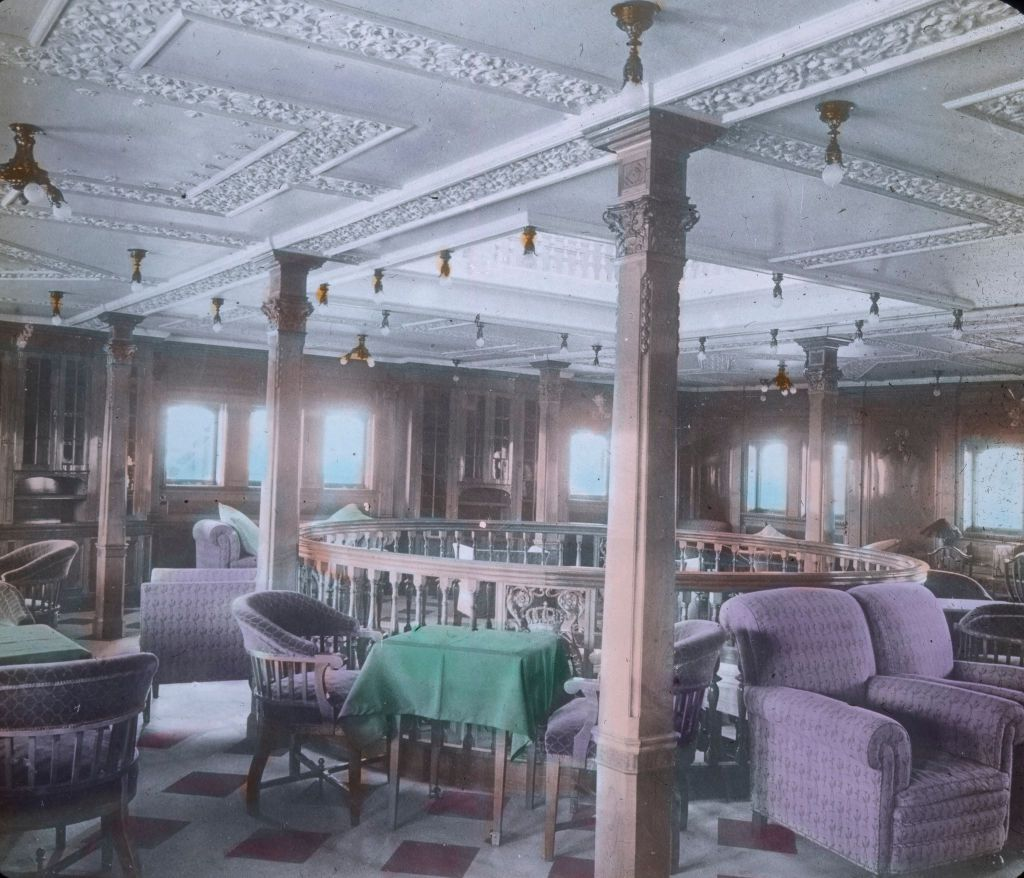

 # Summary of the Analysis of Relationships Between Variables
 
 1. There were 466 women and 843 men on board. 67% (339) of women survived the disaster, compared to only 32% (161) of men.
 2. In the first class, 96% of women and 34% of men survived. In the second class, 88% of women and only 14% of men survived. In the third class, only 49% of women and 15% of men survived.
 3. In the first class, 86% of children under 18 survived. In the second class, 87% survived, and in the third class, only 36% survived.
 4. In the first class, 53% of passengers aged 50+ survived. In the second class, 15% survived, and in the third class, 9% survived.
 5. Passengers in the 1st and 2nd class who paid more for their tickets had a better chance of survival. The ticket price in the 3rd class did not affect survival rates.
 6. Traveling with family had a positive impact on survival rates. This trend is visible among 1st and 2nd class passengers, likely because wealthier women, who had the highest survival rates, typically did not travel alone at that time. I specifically highlighted men to see if those traveling with and caring for their families had a better chance of survival than those traveling alone. According to my chart above, it seems they did not. However, ChatGPT, citing articles on the disaster, claims they definitely did.
 7. Officially, there was no class division during evacuation. Unofficially, first-class passengers were highly privileged compared to others. This was due to their cabins being closest to the lifeboats and the crew assisting first-class passengers first. First-class passengers were also the first to be informed by the crew about the severity of the situation. This information was crucial, as most passengers realized too late that the unsinkable Titanic would indeed sink. The chart above shows that boats 3-8 were almost exclusively filled with first-class passengers. Our DataFrame does not contain crew data, but we know from other sources that lifeboats were not full. This was likely to ensure more comfort for first-class passengers. The chaos and panic during evacuation and lack of proper crew training were contributing factors.
 
 Source: ChatGPT, when asked for sources, cites the books: "A Night to Remember" by Walter Lord, "The Loss of the S.S. Titanic" by Lawrence Beesley, "Titanic: A Voyage of Discovery" by Tror Rowe. It's interesting to consider whether it actually has these books in its datasets or just claims to for appearance.


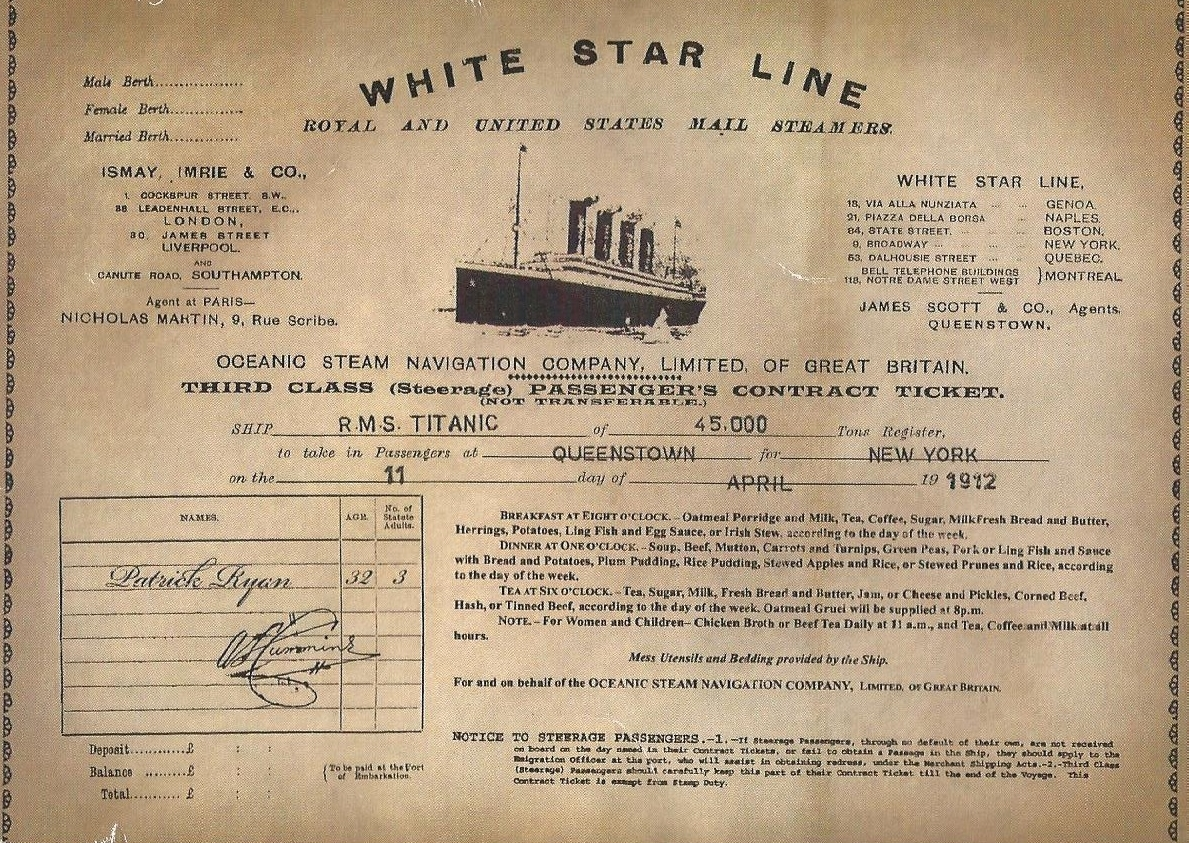

 ## 6. Analysis of Outliers
 
 At this stage, we will examine values and information that significantly differ from the rest of the data. We will answer the following questions:
 
 1. How many small children under 2 (outliers) were there, and what was their survival rate?
 2. Who were the individuals with the most expensive tickets, and what was included in the ticket price that made it almost 100 times more expensive than the cheapest?
 3. How many people had free tickets, why, and who were they?
 4. Why were there only 5 passengers in lifeboat number one, and who were they?
 5. Were there individuals who made it to a lifeboat but did not survive?
 6. Were there individuals who did not make it to any lifeboat but somehow survived?


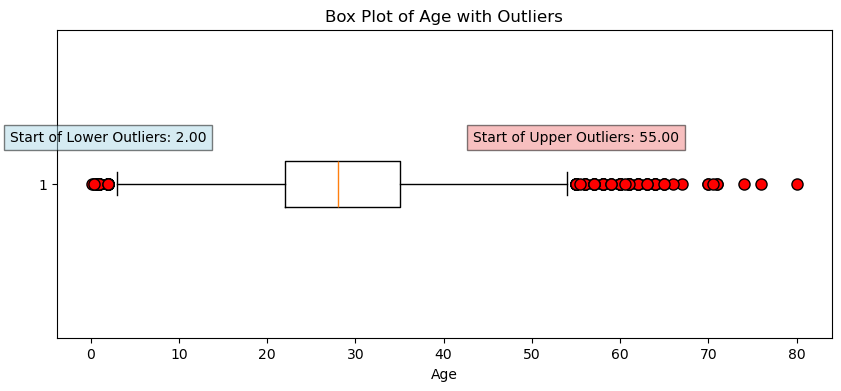

In [32]:
# 1. How many small children under 2 (outliers) were there, and what was their survival rate?
# Create a box plot for age and a DataFrame for children under 2 years.

# Filter children under 2
df_babies = df[df['age'] < 2]

# Group by class and survival status
grouped_babies = df_babies.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Calculate total children in each class
total_babies = grouped_babies.sum(axis=1)

# Calculate percentage of children who survived in each class
percentage_babies_survived = (grouped_babies[1] / total_babies) * 100

# Create a DataFrame with the results
df_babies_result = pd.DataFrame({
    'Total Children': total_babies,
    'Survived': grouped_babies[1],
    'Survived (%)': percentage_babies_survived
})

# Calculate quartiles and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define whisker range
lower_whisker = max(df['age'].min(), Q1 - 1.5 * IQR)
upper_whisker = min(df['age'].max(), Q3 + 1.5 * IQR)

# Define flier properties for outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Plot the box plot
plt.figure(figsize=(10, 4))
plt.boxplot(df['age'], vert=False, flierprops=flierprops)

# Set the title and labels
plt.title('Box Plot of Age with Outliers')
plt.xlabel('Age')

# Annotate the start of the upper outliers (the point just beyond the upper whisker)
upper_outliers = df['age'][df['age'] > upper_whisker]
if not upper_outliers.empty:
    start_of_upper_outliers = upper_outliers.min()
    plt.text(start_of_upper_outliers, 1.15, f'Start of Upper Outliers: {start_of_upper_outliers:.2f}', 
             ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))

# Annotate the start of the lower outliers (the point just beyond the lower whisker)
lower_outliers = df['age'][df['age'] < lower_whisker]
if not lower_outliers.empty:
    start_of_lower_outliers = lower_outliers.max()
    plt.text(start_of_lower_outliers, 1.15, f'Start of Lower Outliers: {start_of_lower_outliers:.2f}', 
             ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightblue', alpha=0.5))

# Display the plot
plt.show()

df_babies_result.style.set_caption("1. How many small children under 2 (outliers) were there, and what was their survival rate?")


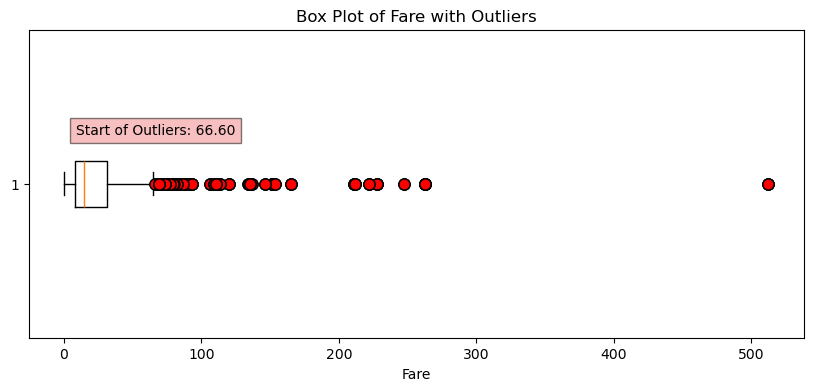

In [33]:
#2. Who were the people who had the most expensive tickets, and what was included in the ticket price that made it almost 200 times more expensive than the cheapest one?
df_rich= df[df['fare'] >100]
# Group by class and survival status
grouped_rich = df_rich.groupby(['pclass','sex', 'survived']).size().unstack(fill_value=0)

# Calculate total children in each class
total_rich = grouped_rich.sum(axis=1)

# Calculate percentage of children who survived in each class
percentage_rich_survived = (grouped_rich[1] / total_rich) * 100

# Create a dataframe with the results
df_rich_result = pd.DataFrame({
    'Total Rich': total_rich,
    'Survived': grouped_rich[1],
    'Survived (%)': percentage_rich_survived
})
# Calculate quartiles and IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define whisker range
lower_whisker = max(df['fare'].min(), Q1 - 1.5 * IQR)
upper_whisker = min(df['fare'].max(), Q3 + 1.5 * IQR)

# Define flier properties for outliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Plot the box plot
plt.figure(figsize=(10, 4))
plt.boxplot(df['fare'], vert=False, flierprops=flierprops)

# Set the title and labels
plt.title('Box Plot of Fare with Outliers')
plt.xlabel('Fare')

# Annotate the start of the outliers (the point just beyond the upper whisker)
outliers = df['fare'][df['fare'] > upper_whisker]
if not outliers.empty:
    start_of_outliers = outliers.min()
    plt.text(start_of_outliers, 1.15, f'Start of Outliers: {start_of_outliers:.2f}', 
             ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='lightcoral', alpha=0.5))

df_rich_result.style.set_caption("2. Who were the people who had the most expensive tickets, and what was included in the ticket price that made it almost 200 times more expensive than the cheapest one?")


In [34]:
df_super_rich = df[df['fare'] >300]
df_super_rich.style.set_caption("3. Who were the people who had the most expensive tickets, and what was included in the ticket price that made it almost 200 times more expensive than the cheapest one?")


In [35]:
# 3. How many people had a free ticket? Why? Who were they?
df_freeride = df[df['fare']==0]
df_freeride.reset_index(drop=True, inplace=True)
df_freeride.index = range(1, len(df_freeride) + 1)
df_freeride.style.set_caption("3. How many people had a free ticket? Why? Who were they?")


In [36]:
# 4. Why were there only 5 passengers in lifeboat number one and who were they?
df_boat1 = df[df['boat']=='1']
df_boat1.reset_index(drop=True, inplace=True)
df_boat1.index = range(1, len(df_boat1) + 1)
df_boat1.style.set_caption("4. Why were there only 5 passengers in lifeboat number one and who were they?")


In [37]:
# 5. Were there people who got on a lifeboat but did not survive?
df_boat_dead = df_boat[df_boat['survived']==0]
df_boat_dead.reset_index(drop=True, inplace=True)
df_boat_dead.index = range(1, len(df_boat_dead) + 1)
df_boat_dead.style.set_caption("5. Were there people who got on a lifeboat but did not survive?")


In [38]:
#6. Were there people who did not get on any lifeboat but somehow survived?

df_no_boat = df[df['boat'].isna()]
df_no_boat_survived = df_no_boat[df_no_boat['survived'] == 1.0]
df_no_boat_survived.reset_index(drop=True, inplace=True)
df_no_boat_survived.index = range(1, len(df_no_boat_survived) + 1)
df_no_boat_survived.style.set_caption("6. Were there people who did not get on any lifeboat but somehow survived?")


 ## Summary of Outlier Analysis
 
 1. There were a total of 22 small children under the age of 2 on the Titanic. Five of them did not survive. They traveled in 3rd class. Being in a privileged group was not enough to survive in 3rd class. The 3rd class had difficulty accessing lifeboats because a large part of the ship was inaccessible to them and was barred by gates.
 2. The most expensive ticket on the Titanic cost 512 GBP. This was 36 times the median price of all tickets. The chart above illustrates the vast gap between the wealthiest and the average passengers. It was an astronomical sum for those times. For comparison, a house in England could be bought for 250 GBP. The price of the most expensive ticket included a "Parlor Suite" apartment with two bedrooms and a private patio. According to our list, only four people could afford such luxury. Additionally, we know that the rest of the 'Parlor Suite' apartments were not for sale but were reserved for the line's owners and VIP guests for promotional purposes. As it turned out, room service, electric blankets and pillows, and access to the gym were not as significant an advantage as the fact that these apartments were on the same deck as the lifeboats.
 3. According to the dataset, 17 people traveled on the Titanic for free. This is not a data error. Some passengers indeed did not pay for their tickets. In the first class, this included the owner of the White Star Lines - Mr. Joseph Bruce Ismay, and his colleagues and close friends (they occupied the remaining apartments described in the previous point). In the 2nd and 3rd classes, these were mainly contractors and employees of the line who were not part of the permanent crew - including members of the famous orchestra that played until the end.
 4. Lifeboat number one carried only five passengers. This is not a data error. First-class passengers, the Duff Gordons, and three of their friends escaped the Titanic by organizing a private lifeboat. Sir Cosmo Duff Gordon was even charged with bribing the crew and refusing to help others but was later acquitted of the charges.
 5. There are nine people who have a lifeboat number but did not survive. This is not a data error. Sources tell us that the boat marked A partially took on water, and passengers sat in it knee-deep in icy water. As for the remaining five people, we are not sure. It can be assumed that hypothermia played a significant role.
 6. There are 23 people who are not assigned to any boat but survived nonetheless. However, I suspect a data error here. Most of these people are young women from the 2nd and 3rd classes. I have not found any information that could confirm or deny this, but I suspect an error - such as not providing a boat number.
 Source: When asked about the source, ChatGPT cites books: "A Night to Remember" by Walter Lord, "The Loss of the S.S. Titanic" by Lawrence Beesley, "Titanic: A Voyage of Discovery" by Trev Rowe. It's interesting whether it actually has these books in its datasets or just claims so to 'look better.'


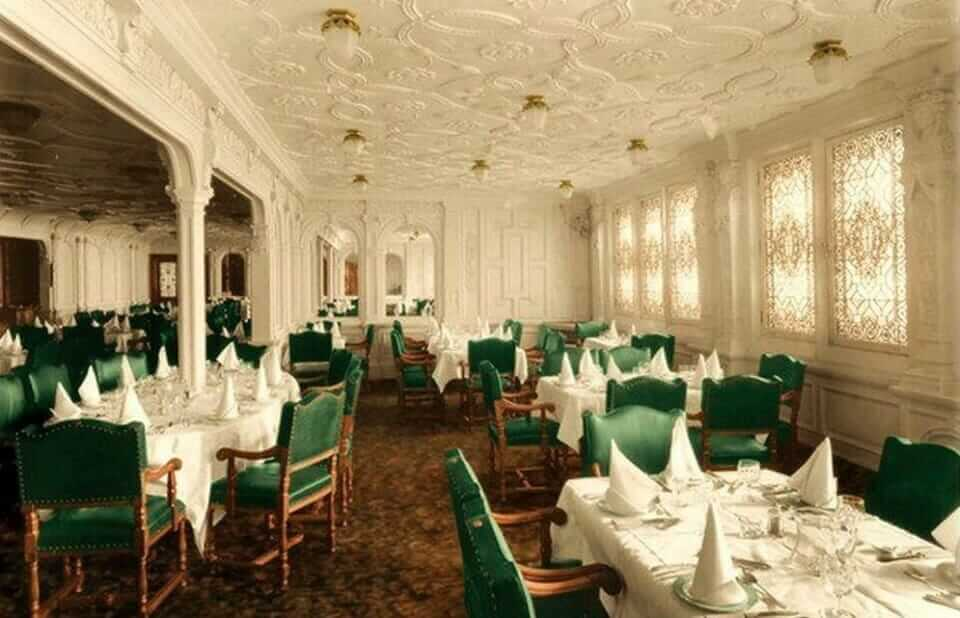

## Observations and Final Conclusions

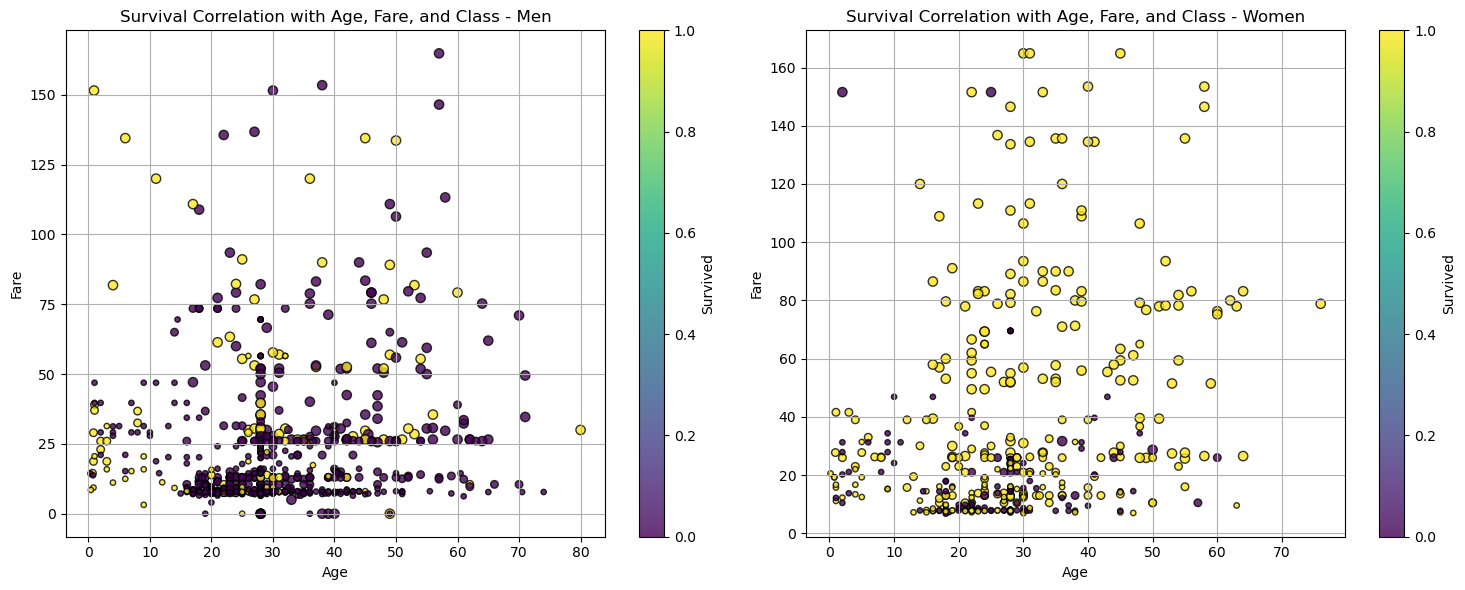

In [39]:
# 8. Summary Visualization - Correlation of Survival with Age, Ticket Price, and Class for Men and Women
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for male passengers
male_passengers = df[df['sex'] == 'male']
male_passengers_filtered = male_passengers[male_passengers['fare'] < 200]
scatter_male = axes[0].scatter(
    x=male_passengers_filtered['age'], 
    y=male_passengers_filtered['fare'], 
    c=male_passengers_filtered['survived'], 
    cmap='viridis', 
    alpha=0.8,
    edgecolors='k',
    s=15 * (4 - male_passengers_filtered['pclass'])  # Size of points based on class
)

# Add color bar for male passengers
cbar_male = plt.colorbar(scatter_male, ax=axes[0])
cbar_male.set_label('Survived')

# Labels and title for male passengers
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Fare')
axes[0].set_title('Survival Correlation with Age, Fare, and Class - Men')
axes[0].grid(True)

# Plot for female passengers
female_passengers = df[df['sex'] == 'female']
female_passengers_filtered = female_passengers[female_passengers['fare'] < 200]
scatter_female = axes[1].scatter(
    x=female_passengers_filtered['age'], 
    y=female_passengers_filtered['fare'], 
    c=female_passengers_filtered['survived'], 
    cmap='viridis', 
    alpha=0.8,
    edgecolors='k',
    s=15 * (4 - female_passengers_filtered['pclass'])  # Size of points based on class
)

# Add color bar for female passengers
cbar_female = plt.colorbar(scatter_female, ax=axes[1])
cbar_female.set_label('Survived')

# Labels and title for female passengers
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_title('Survival Correlation with Age, Fare, and Class - Women')
axes[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

 Finally, I added two charts that clearly illustrate the survival correlations. Yellow dots represent rescued individuals. Large dots indicate first class, medium dots indicate second class, and the smallest dots indicate third class.


 ### What do the numbers tell us?
 
 If we were to identify a single variable that had the greatest impact on survival, it was undoubtedly gender.
 The crew followed the principle of women and children first. This rule was imposed by both maritime law and custom. This is clearly reflected in the data.
 The second most important factor was class and ticket price - wealthier passengers were more privileged. The third factor was age, meaning that the youngest passengers had the highest chances of survival. The fourth factor was whether someone traveled with family or alone. However, this variable played a lesser role for the poorest passengers.
 
 The data on class and ticket price perfectly reflect the social stratification of that time.
 The majority of victims were men traveling in third class. In this class, fatalities were even seen among the youngest passengers. The poorest passengers were isolated from the upper decks of the massive ship. They were also isolated from information. A large portion of passengers simply did not know they were in serious trouble. Even if there was space for them in the lifeboats, they either couldn't reach them or didn't know they should.
 
 Could more people have been saved? The data suggests yes. There was still plenty of room in the lifeboats. However, this would not have significantly changed the scale of the tragedy. There were simply too few lifeboats. I believe we should not judge the decisions made during the evacuation. None of us knows how we would have acted. We should judge the decisions made "calmly" on an ordinary day in the comfort of one's office. These very decisions led to so many deaths. Evidence of this is the fact that after the disaster, a number of legal regulations regarding the number of lifeboats and navigation and speed in difficult sea conditions were changed.
  
 The biggest problem with the Titanic was not the lack of crew training, the chaotic and inept evacuation, the lack of lifeboats, or excessive speed. The biggest problem was that everyone - absolutely everyone - from the poorest to the wealthiest succumbed to the illusion that the Titanic was unsinkable. This illusion led to a series of poor decisions before the disaster and to panic and chaos during the disaster. The belief in one's own infallibility, arrogance, and blind faith in technology - these were the main causes of this epic tragedy. I wonder if things are different today.



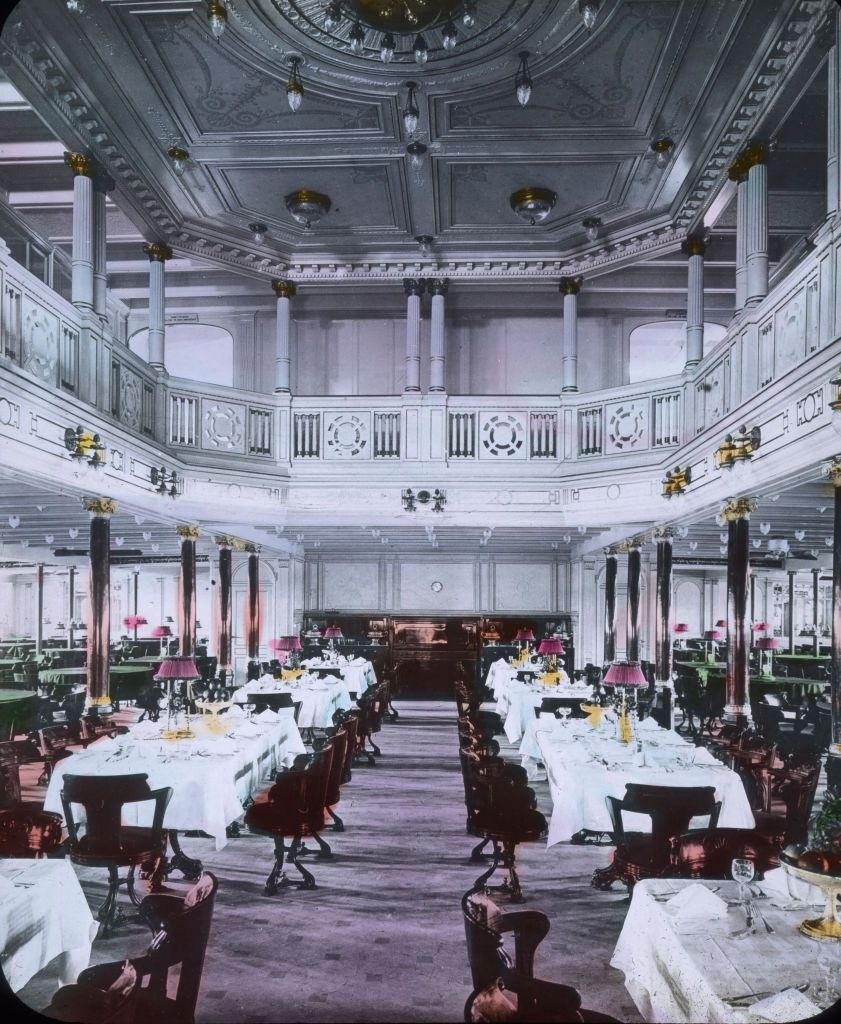

In [2]:
!jupyter nbconvert titanic_en.ipynb --to html --no-input --no-prompt --output titanic_en_as_report.html

[NbConvertApp] Converting notebook titanic_en.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 8043301 bytes to titanic_en_as_report.html
